[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kjmazidi/NLP/blob/master/Part_2-Words/Chapter_05_words/5.2_Words1.ipynb)





###### Code accompanies *Natural Language Processing* by KJG Mazidi, all rights reserved.

# Chapter 5.2 NLTK Text Object and Methods

## Demo for text analysis with NLTK
### Code accompanies Section 5.2 

NLTK is open source. The Text class definition can be found [here](https://www.nltk.org/_modules/nltk/text.html)

In [ ]:
# when running on colab, 
    # download punkt for sentence segmentation 
    # download wordnet for lemmatization and stemming

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('book')

In [1]:
# imports used in the notebook

from nltk.book import *
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## NLTK Text object

These text documents are objects of NLTK's Text class. Essentially it is a wrapper around the tokens of the original documents. The Text object has many build-in methods:

* collocations
* common_contexts
* concordance
* count
* dispersion_plot
* index
* plot
* similar
* as well as some functions designed to make regex-type searches easier

To make your own text document out of a raw text file, first read in the file, tokenize it, then make a Text object out of it, as shown below:

In [2]:
# build your own Text object so that you can use the methods

from nltk.tokenize import word_tokenize
from nltk.text import Text

with open('const.txt', 'r') as f:
    text = f.read()
# remove newline characters
text = text.replace('\n', ' ')

tokens = word_tokenize(text)

# lowercase, get rid of punctuation, numbers
tokens = [t.lower() for t in tokens if t.isalpha()]
          
text_const = Text(tokens)
print("\nSome tokens from constitution:\n", text_const[:20])


Some tokens from constitution:
 ['we', 'the', 'people', 'of', 'the', 'united', 'states', 'in', 'order', 'to', 'form', 'a', 'more', 'perfect', 'union', 'establish', 'justice', 'insure', 'domestic', 'tranquility']


### Demo of selected Text methods

The following code chunks demo some of these Text methods, and some are covered in other notebooks. 

In [3]:
text_const.count('people')  # this is identical to Python's count()

9

In [4]:
text_const.concordance('people')  # print the context for every occurrence of 'people'

Displaying 9 of 9 matches:
we the people of the united states in order to fo
ers chosen every second year by the people of the several states and the elect
or of the press or the right of the people peaceably to assemble and to petiti
ty of a free state the right of the people to keep and bear arms shall not be 
d by law amendment the right of the people to be secure in their persons house
or disparage others retained by the people amendment the powers not delegated 
o the states respectively or to the people amendment the judicial power of the
tors from each state elected by the people thereof for six years and each sena
ke temporary appointments until the people fill the vacancies by election as t


In [5]:
text_const.index('people')  # find the index of first occurrence

2

In [6]:
text_const.similar('people')  # finds words that appear in same context as 'people'

constitution congress senate legislature place laws right militia
jurisdiction citizens blessings house members year state age number
service term law


In [7]:
text_const.common_contexts(['people', 'right'], 10)  # see what words share context wtih people and right

the_of the_to


## Dispersion plots

A dispersion plot visualizes word occurrences in a document. Each line represents the entire document, token by token. The ticks note occurrences of the word. 

If you get an error, you may need to install matplotlib.

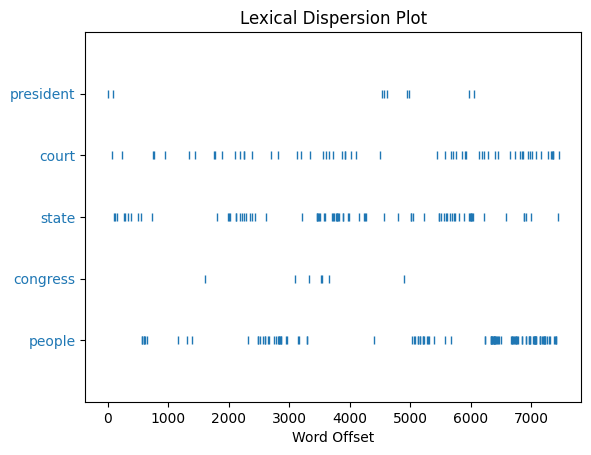

In [8]:
text_const.dispersion_plot(['people', 'congress', 'state', 'court', 'president'])

## Generate text

NLTK even has a generate() method which will generate text similar to text in the document. 

In [9]:
text_const.generate()

representatives according to the states respectively the appointment
of such male citizens shall bear to the discipline prescribed by
congress to which the district would be entitled if it were a state or
with a foreign power or engage in war unless actually invaded or in
adhering to their jurisdiction congress shall have the sole power of
the house of representatives shall immediately choose by ballot for
president and if no person shall be necessary except on a presentment
or indictment of a term of four years and been fourteen years a
resident within the jurisdiction thereof for six years


Building ngram index...


'representatives according to the states respectively the appointment\nof such male citizens shall bear to the discipline prescribed by\ncongress to which the district would be entitled if it were a state or\nwith a foreign power or engage in war unless actually invaded or in\nadhering to their jurisdiction congress shall have the sole power of\nthe house of representatives shall immediately choose by ballot for\npresident and if no person shall be necessary except on a presentment\nor indictment of a term of four years and been fourteen years a\nresident within the jurisdiction thereof for six years'

## Frequency Distributions

The Text object also has methods to calculate and plot frequency distributions, shown next. The frequency distribution quantifies how the total number of tokens in the text are distributed among the vocabulary items. The *vocabulary* is the set of unique tokens.



In [10]:
fdist1 = FreqDist(text_const)
print(fdist1)

<FreqDist with 1131 samples and 7488 outcomes>


In [11]:
fdist1.most_common(10)  # find the 10 most common words

[('the', 726),
 ('of', 494),
 ('shall', 306),
 ('and', 264),
 ('to', 202),
 ('be', 179),
 ('or', 160),
 ('in', 145),
 ('states', 129),
 ('president', 109)]

In [12]:
fdist1['people']  # same results as count()

9

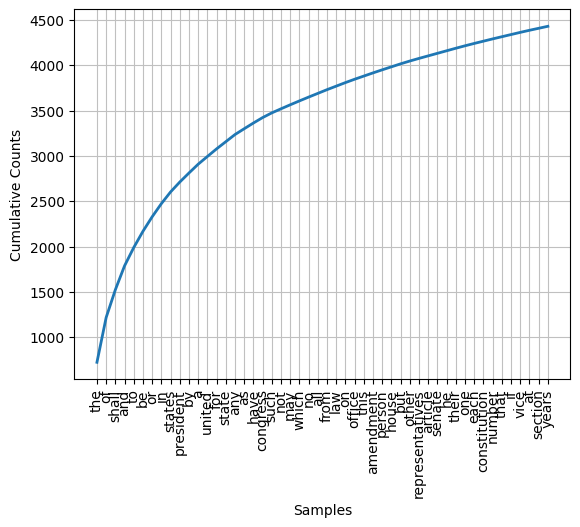

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [13]:
fdist1.plot(50, cumulative=True)  # plot the frequencies of the 50 most common words

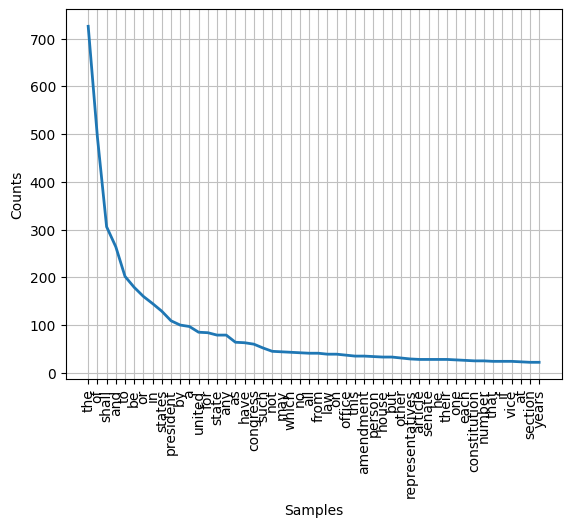

<Axes: xlabel='Samples', ylabel='Counts'>

In [14]:
fdist1.plot(50, cumulative=False)  # plot the frequencies of the 50 most common words

### Zipf's law

Zipf's law states that for a given text corpus, the frequency of any word is inversely proportional to its rank in the frequency table. For example, the most common word occurs twice as often as the next most common word, three times as often as the next work, etc. 

George Zipf discovered this phenomenon in 1935 but no one knows why words follow this law. 

There will be many words that only occur once in a document. There is a special term for these words: hapax legomenon. The term is a transliteration of a Greek phrase that means "something that is said once."

NLTK has a method to discover these, see below.

In [15]:
hapaxes = fdist1.hapaxes()
hapaxes[:10]

['perfect',
 'insure',
 'tranquility',
 'blessings',
 'ourselves',
 'posterity',
 'legislative',
 'included',
 'adding',
 'fifths']

### Heap's Law

The following code chunk processes a tokenized text sequentially, adding 1 to the dictionary count if the word has already been encountered, or adding a new dictionary item for words that have not yet been encountered:

In [16]:
vocab = {} 

for token in tokens:
    if token in vocab:
        vocab[token] += 1
    else:
        vocab[token] = 1

The following dictionary comprehension does the same thing as the for loop above:

In [17]:
# make a dictionary of word counts 
vocab = {t:tokens.count(t) for t in tokens}
print(len(vocab), 'items in dictionary')

1131 items in dictionary


As a corpus is processed, fewer and fewer new words will be encountered. **Heap's law** quantifies this phenomenon. Vocabulary growth, v, is a function of some constant, k, and the total number of words in the corpus, n, raised to a power b. 

$v = k * n^b$

The constants k and b are found experimentally, and vary by corpus. k usually ranges between 30 and 100. A common b value is 0.5.

Often the number of unique vocabulary words in a corpus is a function of the square root of the number of words in the document. 

### More examples

The next two code chunks explore other ways to get to know the vocabulary of a document. The first code chunk below builds the vocabulary and then uses a list comprehension to get a list of all words longer than 12 characters.

The second code chunk looks for words that are fairly common and fairly long. The code returns a list of tuples with the first item in the tuple as the word, and the second as the count.

In [18]:
# look for long words in the consitution
v = set(text_const)  # get a vocabulary
long_words = [w for w in v if len(w) > 12]
long_words

['constitutionally',
 'participation',
 'massachusetts',
 'transportation',
 'naturalization',
 'qualifications',
 'notwithstanding',
 'controversies',
 'reconsideration',
 'appropriations',
 'establishment',
 'appropriation',
 'confederation',
 'extraordinary',
 'consideration',
 'constitutional',
 'representatives',
 'representative',
 'representation',
 'disqualification',
 'qualification',
 'counterfeiting',
 'insurrections',
 'apportionment']

In [19]:
# find common, longish words
long_common = [(w, fdist1[w]) for w in v if len(w) > 7 and fdist1[w] > 7]
long_common

[('executive', 13),
 ('officers', 11),
 ('president', 109),
 ('amendment', 35),
 ('electors', 16),
 ('jurisdiction', 9),
 ('legislation', 9),
 ('election', 9),
 ('appropriate', 8),
 ('government', 8),
 ('representatives', 29),
 ('constitution', 25),
 ('necessary', 9),
 ('legislatures', 8),
 ('legislature', 13),
 ('citizens', 18),
 ('senators', 13),
 ('congress', 60),
 ('authority', 8),
 ('vacancies', 8),
 ('majority', 14)]